In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob
import seaborn as sns

In [22]:
def measure_prediction_similarity(pred_df, label_df, epoch, image_ids):    
    score_dict = {'matched': 0, 'closeby': 0, 'too_far': 0}
    total = 0

    exact, closeby, too_far_imgs = [], [], []

    for img in image_ids:
        img_pred = pred_df[pred_df.epoch==epoch][img]
        img_gt = label_df[label_df.epoch==epoch][img]

        diff = abs(img_pred.round().item() - img_gt.item())

        if diff == 0:
            score_dict['matched']+=1
            exact.append((img, img_pred.item(), img_pred.round().item()))
        elif diff == 1:
            score_dict['closeby']+=1
            closeby.append((img, img_pred.item(), img_pred.round().item()))
        else:
            score_dict['too_far']+=1
            too_far_imgs.append((img, img_pred.item(), img_pred.round().item()))
        
        total +=1
    
    print(f'\nExact: {exact}')
    print(f'Closeby: {closeby}')
    print(f'Too far: {too_far_imgs}')
    
    return score_dict, total


In [89]:
labels = pd.read_csv(r"C:\Users\Parinita Edke\OneDrive - SickKids\vanilla-singletask\run-20230713_151912-vqocoqpx\files\saved_preds\train_labels.csv")
preds = pd.read_csv(r"C:\Users\Parinita Edke\OneDrive - SickKids\vanilla-singletask\run-20230713_151912-vqocoqpx\files\saved_preds\train_preds.csv")

In [17]:
# image_ids = list(labels.keys())
# image_ids.remove('epoch')
def score_breakdown(dir_path):
    dir_path = dir_path

    anatomy = ['Shaft'] #['Glans', 'Meatus', 'Shaft']
    modes = ['val']# ['train', 'val']

    for mode in modes:
        labels = pd.read_csv(fr"{dir_path}\files\saved_preds\{mode}_labels.csv")
        preds = pd.read_csv(fr"{dir_path}\files\saved_preds\{mode}_preds.csv")

        for bodypart in anatomy:
            if mode == 'train':
                image_ids = list(labels.filter(regex=bodypart).keys())
            elif mode == 'val':
                image_ids = list(labels.filter(regex=bodypart).filter(regex='val').keys())

            score_dict, total = measure_prediction_similarity(preds, labels, epoch=39, image_ids=image_ids)
            print(f'{mode}-{bodypart} Score dict: {score_dict}', f'\nTotal: {total}')
    

In [30]:
score_breakdown(dir_path=r"C:\Users\Parinita Edke\OneDrive - SickKids\vanilla-multitask\run-20230719_190736-4sf2ribw")


Exact: [('val_Harris poor plate2-Shaft', 1.4558899402618408, 1.0), ('val_Photo 2017-06-07, 08 23 21-Shaft', 1.4558899402618408, 1.0), ('val_DSC08485-Shaft', 1.4558899402618408, 1.0), ('val_Photo 2017-06-05, 10 36 01-Shaft', 1.4558899402618408, 1.0), ('val_2018-05-09 11.41.39-Shaft', 1.4558899402618408, 1.0), ('val_DSC07564-Shaft', 1.4558899402618408, 1.0)]
Closeby: [('val_DSC02086-Shaft', 1.4558899402618408, 1.0), ('val_2018-01-15 08.39.51-Shaft', 1.4558899402618408, 1.0), ('val_Photo 2015-09-03, 8 25 57 AM-Shaft', 1.4558899402618408, 1.0), ('val_DSCF5986-Shaft', 1.4558899402618408, 1.0), ('val_Photo 2017-01-26, 11 18 57 AM-Shaft', 1.4558899402618408, 1.0)]
Too far: [('val_DSC00723-Shaft', 1.4558899402618408, 1.0), ('val_Penoscrotal with bad plate-Shaft', 1.4558899402618408, 1.0), ('val_DSC04054-Shaft', 1.4558899402618408, 1.0), ('val_P1080221-Shaft', 1.4558899402618408, 1.0), ('val_DSC03990-Shaft', 1.4558899402618408, 1.0), ('val_DSC07609-Shaft', 1.4558899402618408, 1.0), ('val_DSC00

Exact: ['val_Harris poor plate2-Shaft', 'val_Photo 2017-06-07, 08 23 21-Shaft', 'val_DSC08485-Shaft', 'val_Photo 2017-06-05, 10 36 01-Shaft', 'val_2018-05-09 11.41.39-Shaft', 'val_DSC07564-Shaft']

Closeby: ['val_DSC02086-Shaft', 'val_2018-01-15 08.39.51-Shaft', 'val_Photo 2015-09-03, 8 25 57 AM-Shaft', 'val_DSCF5986-Shaft', 'val_Photo 2017-01-26, 11 18 57 AM-Shaft']

Too far: ['val_DSC00723-Shaft', 'val_Penoscrotal with bad plate-Shaft', 'val_DSC04054-Shaft', 'val_P1080221-Shaft', 'val_DSC03990-Shaft', 'val_DSC07609-Shaft', 'val_DSC00131-Shaft']

In [43]:
score_breakdown(dir_path=r"C:\Users\Parinita Edke\OneDrive - SickKids\vanilla-singletask\run-20230713_151912-vqocoqpx")

train-Glans Score dict: {'matched': 56, 'closeby': 84, 'too_far': 15} 
Total: 155
train-Meatus Score dict: {'matched': 38, 'closeby': 100, 'too_far': 17} 
Total: 155
train-Shaft Score dict: {'matched': 25, 'closeby': 75, 'too_far': 55} 
Total: 155
val-Glans Score dict: {'matched': 7, 'closeby': 10, 'too_far': 1} 
Total: 18
val-Meatus Score dict: {'matched': 3, 'closeby': 5, 'too_far': 10} 
Total: 18
val-Shaft Score dict: {'matched': 2, 'closeby': 9, 'too_far': 7} 
Total: 18


In [6]:
dir_path = r"C:\Users\Parinita Edke\OneDrive - SickKids\vanilla-multitask\run-20230719_162439-ryjigtpv"
df = pd.read_csv(fr"{dir_path}\files\saved_preds\val_preds.csv")
df
wanted_keys = list(df.filter(regex='Shaft').filter(regex='val').keys())
temp = df[wanted_keys]
temp.iloc[-1]

val_Photo 2017-06-07, 08 23 21-Shaft       1.484688
val_2018-01-15 08.39.51-Shaft              1.115563
val_DSC03990-Shaft                         1.505818
val_DSC00131-Shaft                         1.489036
val_2018-05-09 11.41.39-Shaft              1.450637
val_DSC00723-Shaft                         1.597884
val_DSCF5986-Shaft                         1.736549
val_DSC08485-Shaft                         1.874517
val_Photo 2015-09-03, 8 25 57 AM-Shaft     1.630836
val_DSC07609-Shaft                         1.260935
val_DSC04054-Shaft                         1.789704
val_Penoscrotal with bad plate-Shaft       1.440158
val_DSC02086-Shaft                         1.561698
val_Harris poor plate2-Shaft               2.213229
val_Photo 2017-01-26, 11 18 57 AM-Shaft    1.806255
val_Photo 2017-06-05, 10 36 01-Shaft       1.291825
val_DSC07564-Shaft                         1.342250
val_P1080221-Shaft                         1.382868
Name: 39, dtype: float64

In [27]:
df['val_Photo 2017-06-05, 10 36 01-Shaft']

0     0.521190
1     1.606410
2     1.280313
3     1.375625
4     1.600958
5     0.723729
6     1.542109
7     1.348605
8     1.381404
9     1.486353
10    1.508448
11    1.367722
12    1.517183
13    1.549547
14    1.479133
15    1.477134
16    1.516306
17    1.503314
18    1.472150
19    1.530013
20    1.451856
21    1.450348
22    1.442101
23    1.429728
24    1.444884
25    1.414677
26    1.406778
27    1.434361
28    1.450226
29    1.446667
30    1.436882
31    1.425113
32    1.457376
33    1.497743
34    1.455534
35    1.438007
36    1.496425
37    1.443995
38    1.443752
39    1.419607
Name: val_Photo 2017-06-05, 10 36 01-Shaft, dtype: float64

In [29]:
df[df.epoch==39]['val_Photo 2017-06-05, 10 36 01-Shaft']

39    1.419607
Name: val_Photo 2017-06-05, 10 36 01-Shaft, dtype: float64

In [36]:
mode = 'train'

mse_folder = "run-20230713_151912-vqocoqpx"
smse_10 = "run-20230713_173330-n2vtyxtz"
smse_25 = "run-20230713_162229-dxwghyiw"

folder_lst = [mse_folder, smse_10, smse_25]
name_lst = ['MSE', 'SteeperMSE10', 'SteeperMSE25']

root_path = r"C:\Users\Parinita Edke\OneDrive - SickKids\vanilla-singletask"


labels = pd.read_csv(fr"{root_path}\{mse_folder}\files\saved_preds\{mode}_labels.csv")
mini_labels = labels.tail(1).transpose().rename(columns={39: "labels"})

result = mini_labels

for i, folder in enumerate(folder_lst):

    preds = pd.read_csv(fr"{root_path}\{folder}\files\saved_preds\{mode}_preds.csv")
    mini_preds = preds.tail(1).transpose().rename(columns={39: f"{name_lst[i]}_preds"})
    result = pd.concat([result, mini_preds], axis=1)
result.drop(index=result.index[0], axis=0, inplace=True)
result

,labels,MSE_preds,SteeperMSE10_preds,SteeperMSE25_preds
DSC00515-Glans,2,1.600193,1.604034,1.624210
DSC00534-Glans,0,1.523363,1.597296,1.701241
DSC00515-Meatus,1,1.824593,1.720772,2.007823
DSC00534-Meatus,3,1.974427,1.990027,1.895537
DSC00515-Shaft,0,1.311026,1.375904,1.415175
...,...,...,...,...
Camara agosto 25 de 2011 041-Shaft,1,1.464305,1.384213,1.378857
Iphone marzo 1 de 2012 043-Shaft,3,1.476877,1.491927,1.474806
DSC01113-Glans,0,1.656235,1.632027,1.541446
DSC01113-Meatus,0,1.859858,1.879956,2.019058


<AxesSubplot:xlabel='labels', ylabel='MSE_preds'>

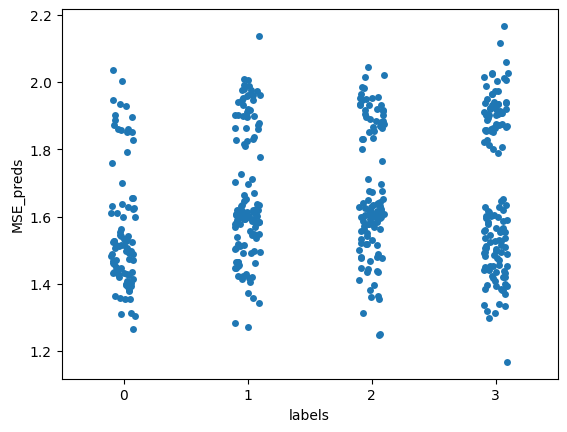

In [29]:
sns.stripplot(data=result, x='labels', y='MSE_preds')

<AxesSubplot:xlabel='labels', ylabel='SteeperMSE10_preds'>

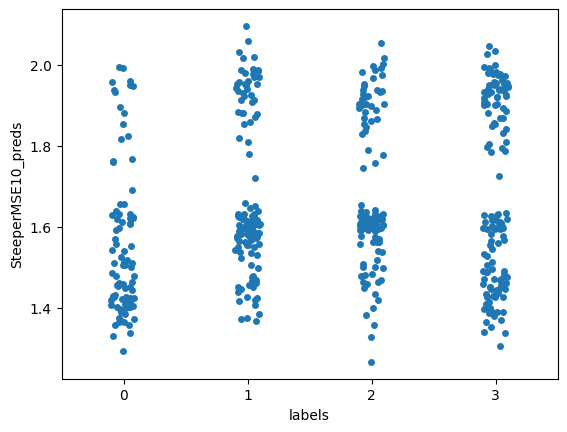

In [30]:
sns.stripplot(data=result, x='labels', y='SteeperMSE10_preds')

<AxesSubplot:xlabel='labels', ylabel='SteeperMSE25_preds'>

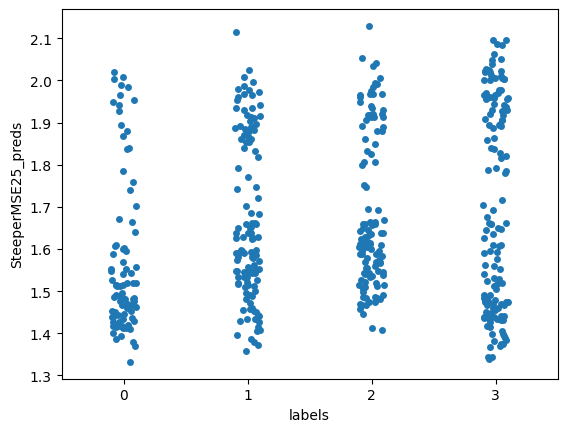

In [37]:
sns.stripplot(data=result, x='labels', y='SteeperMSE25_preds')

In [64]:
path = Path(r'C:\Users\Parinita Edke\Desktop\Hypospadias-Project\manual-baselines\model_preds')    
scores = {}

for dir in list(path.iterdir()):
    dir_name = dir.stem
    scores[dir_name] = []

    files = list(dir.glob("*val*"))
    # print(str(files[0]))
    # print(list(dir.iterdir().glob('*train*')))

    labels = pd.read_csv(fr"{str(files[0])}")
    preds = pd.read_csv(fr"{str(files[1])}")
    

    score_dict, total = measure_prediction_similarity(preds, labels, epoch=24)

    scores[dir_name].extend([score_dict, total])

    

In [65]:
scores

{'fancy-dawn-34': [{'matched': 33, 'closeby': 50, 'too_far': 16}, 99],
 'laced-sea-39': [{'matched': 33, 'closeby': 52, 'too_far': 14}, 99],
 'leafy-fire-35': [{'matched': 28, 'closeby': 36, 'too_far': 35}, 99],
 'northern-dew-38': [{'matched': 33, 'closeby': 52, 'too_far': 14}, 99],
 'stilted-jazz-36': [{'matched': 26, 'closeby': 35, 'too_far': 38}, 99],
 'worthy-microwave-40': [{'matched': 33, 'closeby': 53, 'too_far': 13}, 99]}

In [81]:
img_dir = Path(r"C:\Users\Parinita Edke\Desktop\Hypospadias-Project\Hypospadias-Data\datasets\19-April-23_split - no_special_chars\train\images")
len(list(img_dir.iterdir()))

155